In [1]:
import numpy as np
import pandas as pd
from typing import Callable, Dict, Tuple, List

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Boston Data

In [2]:
# Loading the Data
boston = load_boston()

# Let's know the keys of data provided
data_keys = boston.keys()
print(data_keys)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Let's load the data into pandas
df = pd.DataFrame(data=boston.data, columns = boston.feature_names)

# Let's load the target of data into another dataframe
target_df = pd.DataFrame(data = boston.target, columns = ["TARGET"])


In [4]:
# Let us print the shape of dataframe 
print(df.shape)

# Let us print the shape of target dataframe
print(target_df.shape)


(506, 13)
(506, 1)


In [5]:
print(df.head())
print(target_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   TARGET
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


In [6]:
# Let us join the target and feture into one differnet dataframe
final_df = pd.concat([df, target_df], axis = 1)

In [7]:
final_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Let's read the description of dataset provided
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data Prep
1. Scale the Data using StandardScaler: [Explanation of Sklearn StandardScaler](https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler)

2. Split Data 


In [9]:
# Scaling the data
s = StandardScaler()
data = s.fit_transform(df)
transformed_data = pd.DataFrame(data= data)

In [10]:
transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [11]:
# Spliting Data

X_train, X_test, y_train, y_test = train_test_split(transformed_data, 
                                                    target_df, 
                                                    test_size = 0.3,
                                                    random_state = 80718)


In [12]:
y_train

,TARGET
4,36.2
410,15.0
380,10.4
378,13.1
10,15.0
...,...
466,19.0
391,23.2
13,20.4
81,23.9


## Modelling the Data


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

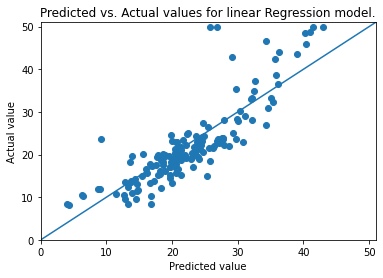

In [14]:
import matplotlib.pyplot as plt

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for linear Regression model.")

plt.xlim([0,51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0,51], [0, 51])

In the above plot we can see the plot of actual vs predicted where the former is on y axis and actual is on x axis.
This plot shows for every predicted score, what the actual score was.
Theoretically, all the dots should lie open straight line, i.e for a predicted score , the actual score must be same.
But that doenot happens in real life Does it? 
So the error would be the distance that is the dots form the straight line.


## Let us calculate the model error:


In [19]:
def mae(pred: np.ndarray, actuals: np.ndarray):
    '''
        Compute mean absolute error:
    '''
    return np.mean(np.abs(preds - actuals))

In [20]:
def rmse(preds: np.ndarray, actuals: np.ndarray):
    '''
        Calculate the Root Mean Square Error
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [21]:
print("Mean Absolute Error: ", round(mae(preds, y_test), 4))
print("Root Mean Squared Error: ", round(rmse(preds, y_test), 4))

Mean Absolute Error:  TARGET    3.5671
dtype: float64
Root Mean Squared Error:  TARGET    5.0476
dtype: float64
